In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
# importing datasets from drive
order_details = pd.read_csv('/content/drive/MyDrive/Datasets/order_details.csv')
orders = pd.read_csv('/content/drive/MyDrive/Datasets/orders.csv')
pizza_types = pd.read_csv('/content/drive/MyDrive/Datasets/pizza_types.csv', encoding='latin' )
pizzas = pd.read_csv('/content/drive/MyDrive/Datasets/pizzas.csv')

In [4]:
order_details.head()

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [5]:
orders.head()

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [6]:
# creating pizza_data1 by merging order_details and orders together
pizza_data1 = pd.merge(order_details, orders, on='order_id')
pizza_data1.head(10)

,order_details_id,order_id,pizza_id,quantity,date,time
0,1,1,hawaiian_m,1,2015-01-01,11:38:36
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40
2,3,2,five_cheese_l,1,2015-01-01,11:57:40
3,4,2,ital_supr_l,1,2015-01-01,11:57:40
4,5,2,mexicana_m,1,2015-01-01,11:57:40
5,6,2,thai_ckn_l,1,2015-01-01,11:57:40
6,7,3,ital_supr_m,1,2015-01-01,12:12:28
7,8,3,prsc_argla_l,1,2015-01-01,12:12:28
8,9,4,ital_supr_m,1,2015-01-01,12:16:31
9,10,5,ital_supr_m,1,2015-01-01,12:21:30


In [7]:
pizza_types


,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."
5,thai_ckn,The Thai Chicken Pizza,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha..."
6,big_meat,The Big Meat Pizza,Classic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau..."
7,classic_dlx,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
8,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
9,ital_cpcllo,The Italian Capocollo Pizza,Classic,"Capocollo, Red Peppers, Tomatoes, Goat Cheese,..."


In [8]:
pizzas

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75
...,...,...,...,...
91,spinach_fet_m,spinach_fet,M,16.00
92,spinach_fet_l,spinach_fet,L,20.25
93,veggie_veg_s,veggie_veg,S,12.00
94,veggie_veg_m,veggie_veg,M,16.00


In [9]:
# creating pizza_data2 by merging pizzas and pizzas_types datasets together
pizza_data2 = pd.merge(pizzas, pizza_types, on='pizza_type_id')
pizza_data2

,pizza_id,pizza_type_id,size,price,name,category,ingredients
0,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,bbq_ckn_m,bbq_ckn,M,16.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
2,bbq_ckn_l,bbq_ckn,L,20.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
3,cali_ckn_s,cali_ckn,S,12.75,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
4,cali_ckn_m,cali_ckn,M,16.75,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
...,...,...,...,...,...,...,...
91,spinach_fet_m,spinach_fet,M,16.00,The Spinach and Feta Pizza,Veggie,"Spinach, Mushrooms, Red Onions, Feta Cheese, G..."
92,spinach_fet_l,spinach_fet,L,20.25,The Spinach and Feta Pizza,Veggie,"Spinach, Mushrooms, Red Onions, Feta Cheese, G..."
93,veggie_veg_s,veggie_veg,S,12.00,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper..."
94,veggie_veg_m,veggie_veg,M,16.00,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper..."


In [10]:
pizza_data1

,order_details_id,order_id,pizza_id,quantity,date,time
0,1,1,hawaiian_m,1,2015-01-01,11:38:36
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40
2,3,2,five_cheese_l,1,2015-01-01,11:57:40
3,4,2,ital_supr_l,1,2015-01-01,11:57:40
4,5,2,mexicana_m,1,2015-01-01,11:57:40
...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,21:23:10
48616,48617,21348,four_cheese_l,1,2015-12-31,21:23:10
48617,48618,21348,napolitana_s,1,2015-12-31,21:23:10
48618,48619,21349,mexicana_l,1,2015-12-31,22:09:54


In [11]:
# merging pizza_data1 and pizza_data2 to form pizza_data
pizza_data = pd.merge(pizza_data1, pizza_data2, on='pizza_id')
pizza_data

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,5,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,21:23:10,ckn_alfredo,M,16.75,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
48616,48617,21348,four_cheese_l,1,2015-12-31,21:23:10,four_cheese,L,17.95,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo..."
48617,48618,21348,napolitana_s,1,2015-12-31,21:23:10,napolitana,S,12.00,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,..."
48618,48619,21349,mexicana_l,1,2015-12-31,22:09:54,mexicana,L,20.25,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


Analysing the pizza_data dataset


In [12]:
pizza_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_details_id  48620 non-null  int64  
 1   order_id          48620 non-null  int64  
 2   pizza_id          48620 non-null  object 
 3   quantity          48620 non-null  int64  
 4   date              48620 non-null  object 
 5   time              48620 non-null  object 
 6   pizza_type_id     48620 non-null  object 
 7   size              48620 non-null  object 
 8   price             48620 non-null  float64
 9   name              48620 non-null  object 
 10  category          48620 non-null  object 
 11  ingredients       48620 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 4.5+ MB


In [13]:
pizza_data.describe()

,order_details_id,order_id,quantity,price
count,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132
std,14035.529381,6180.119770,0.143077,3.621789
min,1.000000,1.000000,1.000000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000
max,48620.000000,21350.000000,4.000000,35.950000


In [14]:
pizza_data.isnull().sum()

,0
order_details_id,0
order_id,0
pizza_id,0
quantity,0
date,0
time,0
pizza_type_id,0
size,0
price,0
name,0


In [15]:
pizza_data['order_details_id'].value_counts()

,count
order_details_id,
48620,1
1,1
2,1
3,1
4,1
...,...
17,1
16,1
15,1


In [16]:
pizza_data['order_id'].value_counts()

,count
order_id,
18845,21
10760,21
20163,15
13906,15
18280,15
...,...
13126,1
7,1
21327,1


In [17]:
#converting date to datetime format
pizza_data['date'] = pizza_data['date'].astype('datetime64[ns]')
pizza_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_details_id  48620 non-null  int64         
 1   order_id          48620 non-null  int64         
 2   pizza_id          48620 non-null  object        
 3   quantity          48620 non-null  int64         
 4   date              48620 non-null  datetime64[ns]
 5   time              48620 non-null  object        
 6   pizza_type_id     48620 non-null  object        
 7   size              48620 non-null  object        
 8   price             48620 non-null  float64       
 9   name              48620 non-null  object        
 10  category          48620 non-null  object        
 11  ingredients       48620 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(7)
memory usage: 4.5+ MB


In [18]:
# converting time to datetime format
pizza_data['time'] = pizza_data['time'].astype('datetime64[ns]')
pizza_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_details_id  48620 non-null  int64         
 1   order_id          48620 non-null  int64         
 2   pizza_id          48620 non-null  object        
 3   quantity          48620 non-null  int64         
 4   date              48620 non-null  datetime64[ns]
 5   time              48620 non-null  datetime64[ns]
 6   pizza_type_id     48620 non-null  object        
 7   size              48620 non-null  object        
 8   price             48620 non-null  float64       
 9   name              48620 non-null  object        
 10  category          48620 non-null  object        
 11  ingredients       48620 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(3), object(6)
memory usage: 4.5+ MB


**Question 1: Find the total sales**

In [19]:
pizza_data['total cost'] = pizza_data['quantity'] * pizza_data['price']
pizza_data.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients,total cost
0,1,1,hawaiian_m,1,2015-01-01,2025-05-12 11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25
1,2,2,classic_dlx_m,1,2015-01-01,2025-05-12 11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",16.00
2,3,2,five_cheese_l,1,2015-01-01,2025-05-12 11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",18.50
3,4,2,ital_supr_l,1,2015-01-01,2025-05-12 11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",20.75
4,5,2,mexicana_m,1,2015-01-01,2025-05-12 11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",16.00


In [20]:
total_sales = pizza_data['total cost'].sum()
print(total_sales)

817860.05


Question 2: Find total quantity of pizzas sold

In [21]:
total_quantity_sold = pizza_data['quantity'].sum()
print(total_quantity_sold)

49574


**Questtion 3: Total orders**

In [22]:
total_orders = pizza_data['order_id'].nunique()
print(total_orders)

21350


# **Question 4: How many pizza types do they sell**

In [23]:
## This info is easily gotten from the pizza types file as the number of rows of that file
pizza_types.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   pizza_type_id  32 non-null     object
 1   name           32 non-null     object
 2   category       32 non-null     object
 3   ingredients    32 non-null     object
dtypes: object(4)
memory usage: 1.1+ KB


In [24]:
## Thus they sell 32 different pizzas

**Question 5: Average price of pizzas**

In [25]:
pizza_avr_price = round(pizza_data['price'].mean(), 2)
print(pizza_avr_price)

16.49


Question 6: Peak hours of sales

In [26]:
peak_hours = pizza_data['time'].dt.hour.value_counts()
print(peak_hours)

time
12    6543
13    6203
18    5359
17    5143
19    4350
16    4185
14    3521
20    3487
15    3170
11    2672
21    2528
22    1370
23      68
10      17
9        4
Name: count, dtype: int64


**Question 6: Peak hours of sales**

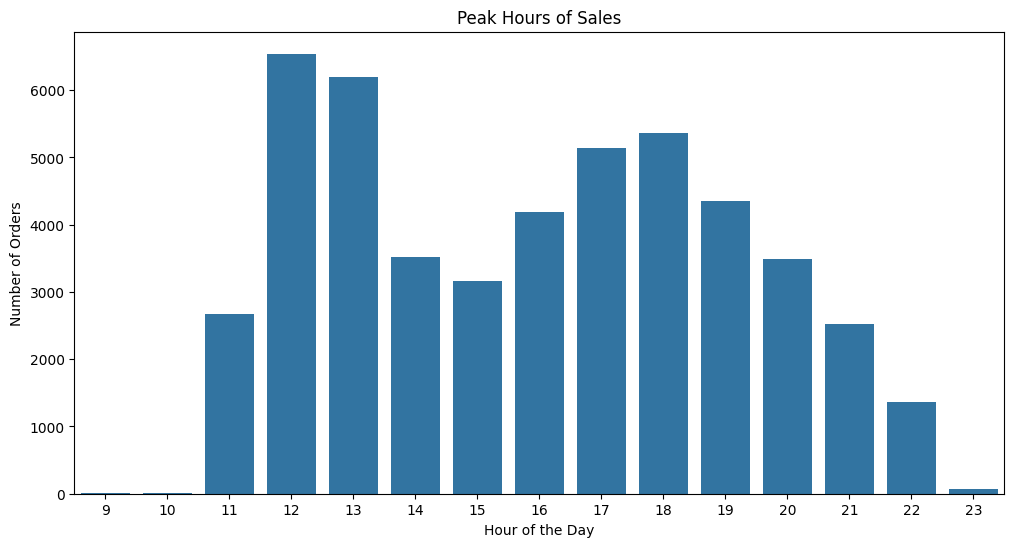

In [27]:
# plot a barplot using seaborn of the data peak_hours

plt.figure(figsize=(12, 6))
sns.barplot(x=peak_hours.index, y=peak_hours.values)
plt.title('Peak Hours of Sales')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.show()


From the graph, we can infere that peak sales are made midday between 12pm to 1pm, followed by evening time between 5pm to 7pm

**Queustion 7: total sales per day**

In [28]:
# the days of the week from the data pizza_data

pizza_data['day'] = pizza_data['date'].dt.day_name()
pizza_data['day'].value_counts()

,count
day,
Friday,8106
Saturday,7355
Thursday,7323
Wednesday,6797
Tuesday,6753
Monday,6369
Sunday,5917


In [29]:
total_sales_per_day = pizza_data.groupby('day')['total cost'].sum()
print(total_sales_per_day)

day
Friday       136073.90
Monday       107329.55
Saturday     123182.40
Sunday        99203.50
Thursday     123528.50
Tuesday      114133.80
Wednesday    114408.40
Name: total cost, dtype: float64


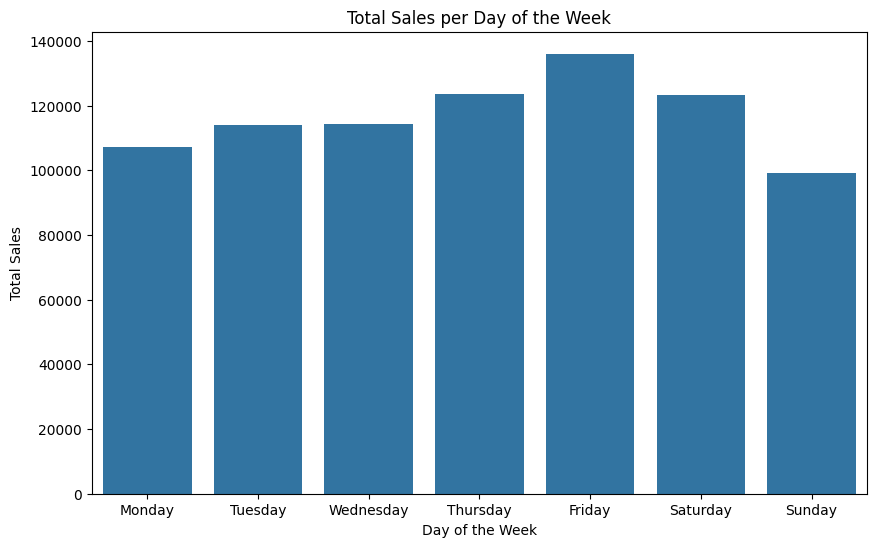

In [30]:
# plot a barplot using the above data
# Sort the days of the week for correct plotting order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
total_sales_per_day = total_sales_per_day.reindex(day_order)

plt.figure(figsize=(10, 6))
sns.barplot(x=total_sales_per_day.index, y=total_sales_per_day.values)
plt.title('Total Sales per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.show()

From the above graph, we can see that the most sales are made on Fridays, followed by Thursdays and Saturdays

**Question 8: Top 5 selling pizzas

In [34]:
total_sales_per_pizza = pizza_data.groupby('name')['total cost'].sum()
total_sales_per_pizza = total_sales_per_day.sort_values(ascending=False)
top_5_selling_pizzas = total_sales_per_day.head()
top_5_selling_pizzas

,total cost
name,
The Thai Chicken Pizza,43434.25
The Barbecue Chicken Pizza,42768.00
The California Chicken Pizza,41409.50
The Classic Deluxe Pizza,38180.50
The Spicy Italian Pizza,34831.25


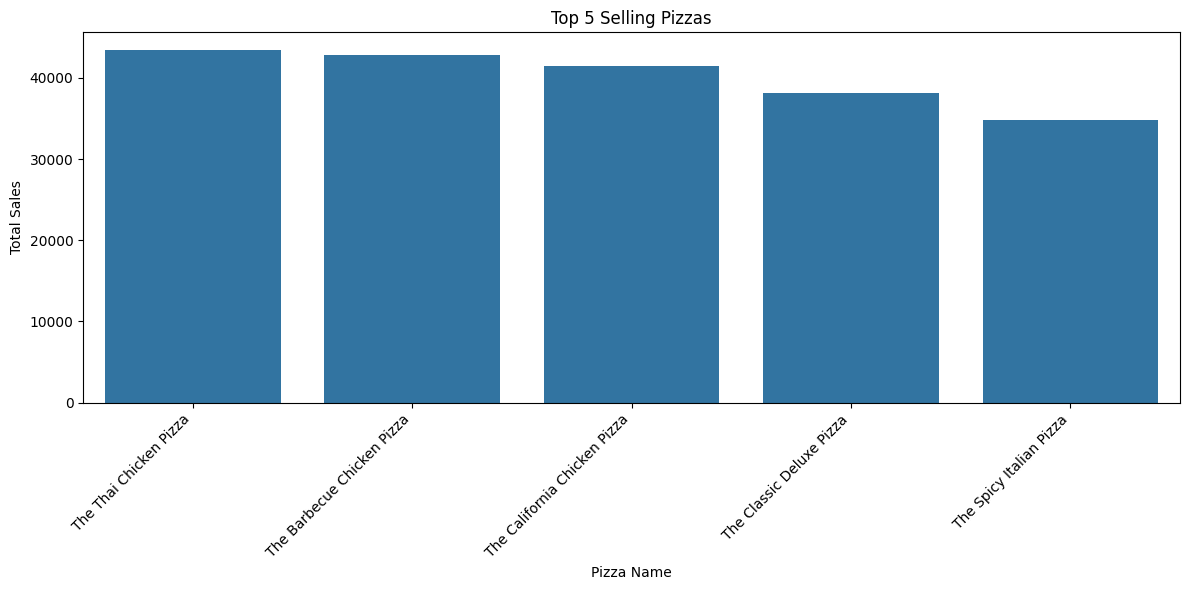

In [35]:
# plot a barplot using the data top_5_selling_pizzas

plt.figure(figsize=(12, 6))
sns.barplot(x=top_5_selling_pizzas.index, y=top_5_selling_pizzas.values)
plt.title('Top 5 Selling Pizzas')
plt.xlabel('Pizza Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

From the plot, we can see that the top selling pizzas are the Thai Chicken pizza, the barbecue chicken pizza, the california chicken pizza, the classic deluxe pizza and the spicy italian pizza

**Question 9: Total sales per month

In [40]:
pizza_data['month'] = pizza_data['date'].dt.month_name()
total_sales_per_month = pizza_data.groupby('month')['total cost'].sum()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
total_sales_per_month = total_sales_per_month.reindex(month_order)
total_sales_per_month

,total cost
month,
January,69793.30
February,65159.60
March,70397.10
April,68736.80
May,71402.75
June,68230.20
July,72557.90
August,68278.25
September,64180.05


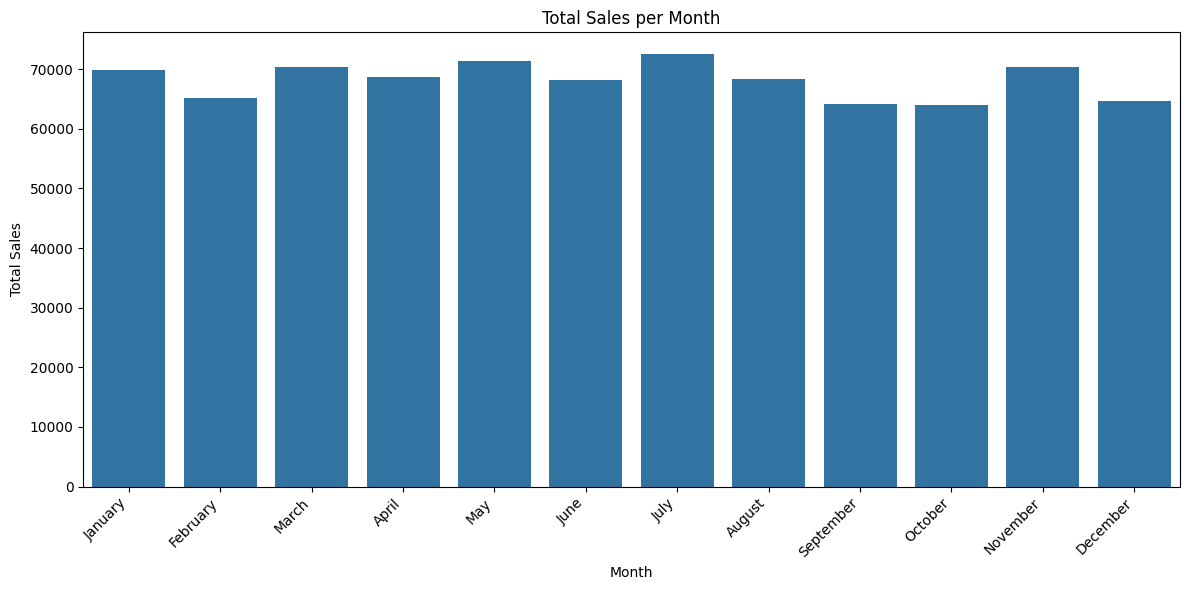

In [41]:
# plot a barplot using  total_sales_per_month

plt.figure(figsize=(12, 6))
sns.barplot(x=total_sales_per_month.index, y=total_sales_per_month.values)
plt.title('Total Sales per Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

From the graph we can see that there is no sharp changes in sales as the months progresses. The month with the most sales, however, is July.

**Question 10: Find poorly performing pizzas

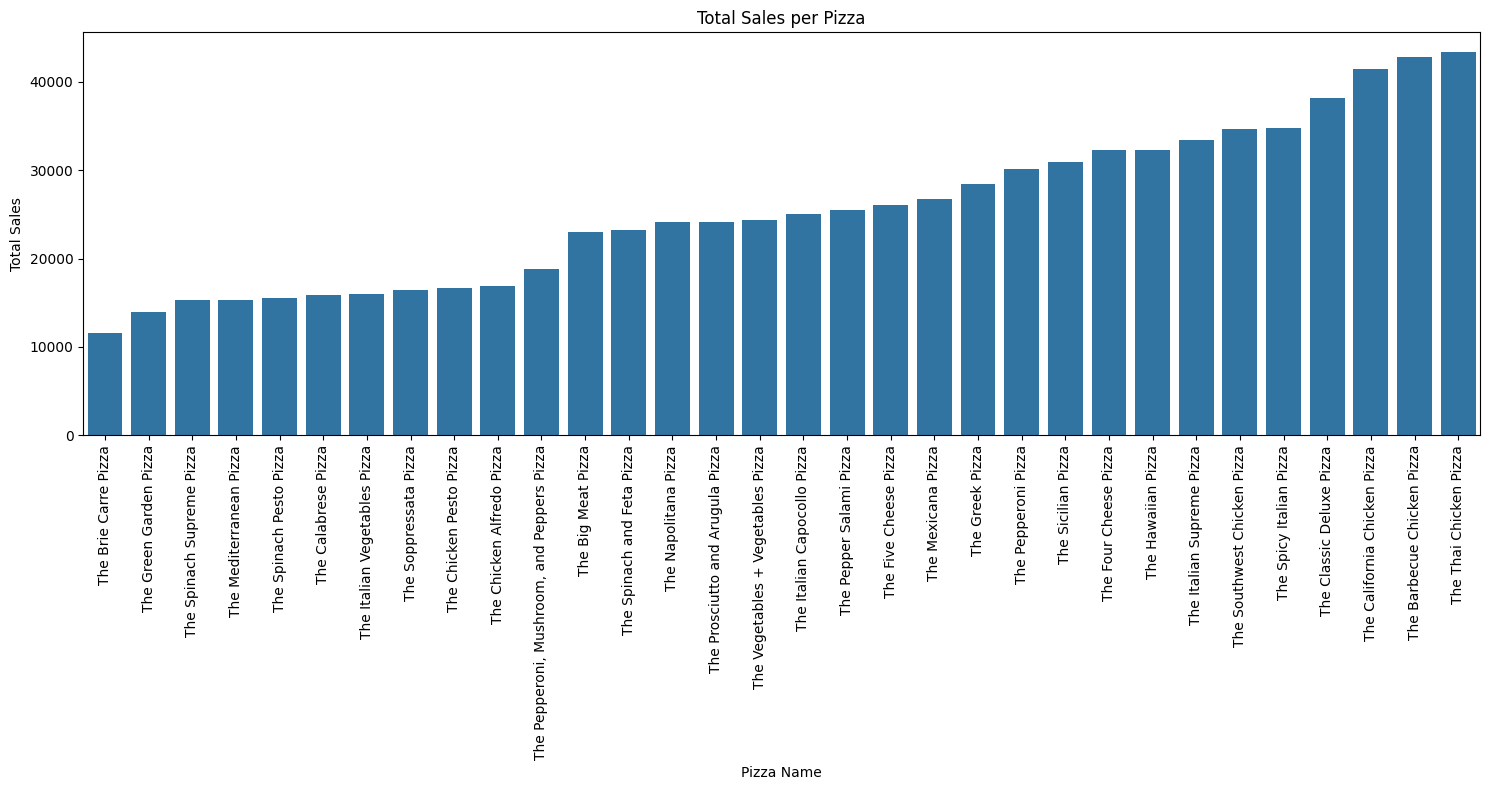

In [42]:
# plot a plot using the total_sales_per_pizza data that shows sales per pizza


# Ensure total_sales_per_pizza is sorted in ascending order to find poorly performing pizzas
total_sales_per_pizza = pizza_data.groupby('name')['total cost'].sum().sort_values(ascending=True)

# Plot a barplot using the total_sales_per_pizza data
plt.figure(figsize=(15, 8)) # Increased figure size to accommodate more labels
sns.barplot(x=total_sales_per_pizza.index, y=total_sales_per_pizza.values)
plt.title('Total Sales per Pizza')
plt.xlabel('Pizza Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=90, ha='center') # Rotate labels for better readability
plt.tight_layout()
plt.show()

In [45]:
least_selling_pizzas = total_sales_per_pizza.head(10)
least_selling_pizzas

,total cost
name,
The Brie Carre Pizza,11588.50
The Green Garden Pizza,13955.75
The Spinach Supreme Pizza,15277.75
The Mediterranean Pizza,15360.50
The Spinach Pesto Pizza,15596.00
The Calabrese Pizza,15934.25
The Italian Vegetables Pizza,16019.25
The Soppressata Pizza,16425.75
The Chicken Pesto Pizza,16701.75


In [47]:
total_sales_per_pizza.tail()

,total cost
name,
The Spicy Italian Pizza,34831.25
The Classic Deluxe Pizza,38180.50
The California Chicken Pizza,41409.50
The Barbecue Chicken Pizza,42768.00
The Thai Chicken Pizza,43434.25


The above line of code shows the least performing pizzas, making sales of less than 20000, which is less than half the sales of the best selling pizza, the Thai Chicken Pizza, at 43,434.25